Testes de hipóteses --- uma introdução com simulação
====================================================



Este notebook é praticamente inteiro baseado no material do curso *Computational and Inferential Thinking: The Foundations of Data Science* criado pelos professores Ani Adhikari, John DeNero e David Wagner da Universidade da Califórnia em Berkeley. O curso está disponível gratuitamente na internet e é altamente recomendado para quem tem vontade de aprofundar seus conhecimentos de estatística (ver referência [1]). Este curso trás uma visão mais intuitiva e mais computacional do que são testes de hipóteses do que o tradicionalmente abordado em livros-texto de estatística (e este foi o motivo de ter sido escolhido para esta disciplina).



## Introdução



Testes estatísticos são realizados para escolhermos entre duas possíveis explicações sobre como o mundo funciona. Chamamos estas &ldquo;visões sobre o mundo&rdquo; de *hipóteses*.

Uma das hipóteses que temos é a *hipótese nula*. Esta hipótese nos diz que os dados observados foram gerados de forma aleatória seguindo as suposições do nosso modelo. A ideia da hipótese nula é que mesmo que a realidade não seja *estritamente igual* à previsão do modelo que supomos, a diferença observada é apenas fruto do acaso. Na prática, <u>a hipótese nula é a hipótese que conseguimos simular computacionalmente</u>.

A outra hipótese é a *hipótese alternativa*. Esta hipótese nos diz que existe alguma razão (que não podemos atribuir ao acaso) que fez com que os dados observados *não* seguissem as suposições do nosso modelo. <u>A hipótese alternativa não nos conta *como* ou *porque* o modelo não condiz com a realidade</u>, ela apenas nos diz que o modelo suposto não condiz com a realidade.

Iremos testar hipóteses neste notebook. É muito importante definirmos o nosso *nível de confiança* antes de iniciar o nosso processo. De forma simples, o nível de confiança, como o próprio nome sugere, está relacionado com a segurança que queremos ter na conclusão do nosso teste. Este será um termo melhor definido ao longo do notebook, mas por enquanto escolha um valor de nível de confiança dentro do intervalo $]0, 1[$.



In [1]:
nivel_confianca = 0.95

## Mendel no país dos testes de hipóteses



Gregor Mendel (1822-1884) foi um monge austríaco e é hoje conhecido como um dos pais do campo da genética. Diversos experimentos de Mendel foram realizados observando plantas de ervilhas. O processo científico de Mendel se deu através da formulação de modelos e hipóteses sobre o comportamento genético das plantas que estudava, seguido da parte experimental de efetivamente plantar as suas plantas de estudo e observar suas características.

Para uma espécie particular de ervilhas, Mendel propôs o seguinte modelo: para cada planta de ervilha, existe uma chance de 75% que a flor dela terá a cor roxa e uma chance de 25% de que a flor dela terá a cor branca. Esta chance independe da cor das demais plantas de ervilha.

Para testar seu modelo, Mendel plantou 929 plantas da variedade de ervilha em questão e observou que 705 delas apresentaram flores roxas e o restante apresentou flores brancas.



In [2]:
porcentagem_roxas_obs = 100 * (705 / 929)
porcentagem_brancas_obs = 100 * ((929 - 705) / 929)

print(f"Porcentagem de roxas observada: {porcentagem_roxas_obs:.1f}%")
print(f"Porcentagem de brancas observada: {porcentagem_brancas_obs:.1f}%")

Porcentagem de roxas observada: 75.9%
Porcentagem de brancas observada: 24.1%


Vamos usar estes dados para testar o modelo de Mendel. Para isso, vamos definir as hipóteses:

-   $H_0$ (hipótese nula): As plantas de ervilha seguem o modelo de Mendel (75% com flor roxa e 25% com flor branca).

-   $H_1$ (hipótese alternativa): As plantas de ervilha *não* seguem o modelo de Mendel.

Observe que as duas hipóteses são complementares e que a hipótese $H_0$ pode ser simulada computacionalmente.

O primeiro passo para realizar o teste de hipótese é escolher uma *estatística de teste*. Esta estatística será utilizada para chegarmos na nossa conclusão. Uma estatística possível neste caso é computar o quão diferente são as probabilidades observadas e preditas. Como temos apenas duas probabilidades, é bastante fácil de visualizar:

$$
\left| 0,75 - 0,759 \right| = 0,09 = | 0,25 - 0,241 |.
$$

Observe também que

$$
\frac{1}{2} \left( |0,75 - 0,759 | + | 0,25 - 0,241 | \right) = 0,09.
$$

**Definição**: a metade da soma das distâncias entre duas distribuições é chamada de *distância de variação total* (total variance distance em inglês, ou simplesmente TVD). Lembre-se que distâncias são sempre números maiores ou iguais a zero!

O TVD é uma estatística de teste bastante razoável para compararmos distribuições. Vamos implementá-la em Python.



In [3]:
import numpy as np


def computa_dist_var_total(distribuicao1, distribuicao2):
    distancia = abs(np.array(distribuicao1) - np.array(distribuicao2))
    distancia_var_total = sum(distancia) / 2
    return distancia_var_total

Agora, vamos computar qual é o *valor da estatística de teste observada*.



In [4]:
distribuicao_modelo = [0.75, 0.25]
distribuicao_observada = [0.759, 0.241]

estatistica_observada = computa_dist_var_total(
    distribuicao_modelo, distribuicao_observada
)

print(f"O valor da estatística de teste observado foi de {estatistica_observada}")

O valor da estatística de teste observado foi de 0.009000000000000008


E agora? Como sabemos se este valor é alto ou baixo? Como sabemos se este valor rejeita $H_0$ ou não rejeita $H_0$? Para seguir em frente, precisamos entender a distribuição de valores da nossa estatística de teste. Uma forma de obter esta distribuição é através de simulação.

O primeiro passo para nossa simulação é ter uma função que gere uma população a partir de uma pmf (pmf é a função massa de probabilidade, releia o notebook sobre distribuições discretas caso tenha dúvidas). O módulo `random` pode fazer isso para nós.



In [5]:
import random

N = 929  # número de plantas de ervilha de Mendel

rotulos = ["roxa", "branca"]
distribuicao = [0.75, 0.25]

populacao = random.choices(rotulos, weights=distribuicao, k=N)

print(f"Fração de roxas {populacao.count('roxa') / N}")
print(f"Fração de brancas {populacao.count('branca') / N}")
print()
print(populacao)

Fração de roxas 0.7427341227125942
Fração de brancas 0.2572658772874058

['branca', 'branca', 'roxa', 'roxa', 'branca', 'roxa', 'roxa', 'roxa', 'roxa', 'branca', 'roxa', 'roxa', 'roxa', 'roxa', 'roxa', 'roxa', 'roxa', 'roxa', 'roxa', 'roxa', 'roxa', 'roxa', 'branca', 'roxa', 'roxa', 'roxa', 'roxa', 'branca', 'branca', 'roxa', 'roxa', 'roxa', 'roxa', 'roxa', 'roxa', 'roxa', 'roxa', 'roxa', 'roxa', 'roxa', 'roxa', 'roxa', 'roxa', 'roxa', 'roxa', 'roxa', 'branca', 'branca', 'roxa', 'roxa', 'branca', 'roxa', 'branca', 'branca', 'roxa', 'roxa', 'roxa', 'roxa', 'roxa', 'roxa', 'branca', 'roxa', 'roxa', 'roxa', 'roxa', 'roxa', 'branca', 'roxa', 'roxa', 'branca', 'branca', 'roxa', 'branca', 'roxa', 'roxa', 'roxa', 'branca', 'roxa', 'roxa', 'roxa', 'roxa', 'roxa', 'roxa', 'roxa', 'roxa', 'roxa', 'branca', 'roxa', 'roxa', 'roxa', 'branca', 'roxa', 'roxa', 'branca', 'roxa', 'roxa', 'branca', 'roxa', 'roxa', 'branca', 'branca', 'roxa', 'roxa', 'roxa', 'branca', 'branca', 'roxa', 'roxa', 'branca', 

Agora vamos programar nossa simulação.



In [6]:
def simulacao():
    """Sorteia plantas de ervilha e computa a distância da variação total."""

    N = 929  # número de plantas de ervilha de Mendel
    rotulos = ["roxa", "branca"]
    distribuicao_modelo = [0.75, 0.25]  # modelo de Mendel

    plantacao_simulada = random.choices(
        rotulos, weights=distribuicao_modelo, k=N
    )

    distribuicao_obtida = []

    for rotulo in rotulos:
        proporcao = plantacao_simulada.count(rotulo) / N
        distribuicao_obtida.append(proporcao)

    distancia = computa_dist_var_total(
        distribuicao_modelo, distribuicao_obtida
    )

    return distancia

Tendo uma simulação, podemos levantar a distribuição da nossa estatística de teste através de um experimento repetindo esta simulação várias vezes.



In [7]:
def experimento(n):
    resultado = []
    for _ in range(n):
        distancia = simulacao()
        resultado.append(distancia)
    return resultado


NUM_REPETICOES = 10000

resultado = experimento(NUM_REPETICOES)

Vamos observar a distribuição da estatística de teste e onde está a estatística de teste observada. Observe que a distribuição abaixo foi construída apenas levando em consideração o modelo de Mendel. A observação de Mendel é apenas uma informação adicional que sobrepusemos ao gráfico (linha vermelha).



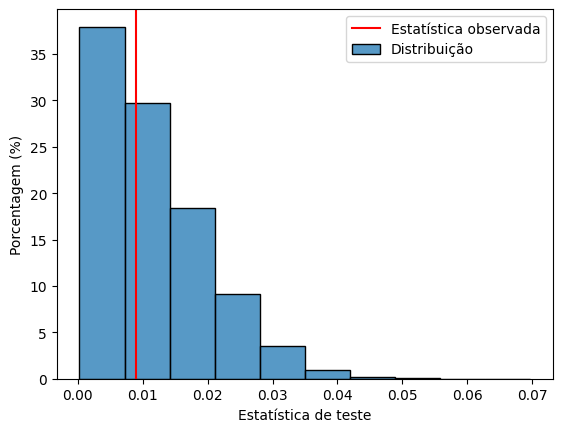

In [8]:
import seaborn as sns

eixo = sns.histplot(resultado, stat="percent", bins=10, label="Distribuição")
eixo.axvline(estatistica_observada, label="Estatística observada", color="red")
eixo.set_xlabel("Estatística de teste")
eixo.set_ylabel("Porcentagem (%)")
eixo.legend()

Apenas da observação visual da distribuição acima, o que você faria: rejeitaria $H_0$ ou não rejeitaria $H_0$?

Visualmente, a estatística observada está no *coração da distribuição* (isto é, dentro da região mais provável da distribuição). Os dados obtidos no experimento de Mendel estão consistentes com $H_0$. Em outras palavras, os dados obtidos no experimento de Mendel *dão suporte* a $H_0$. *Não é razoável* rejeitar $H_0$ na luz dos dados obtidos.

Agora suponha que a realidade tivesse sido outra e o experimento de Mendel tivesse resultado em um valor para a estatística de teste observada de 0.032. Vamos ver como ficaria o gráfico.



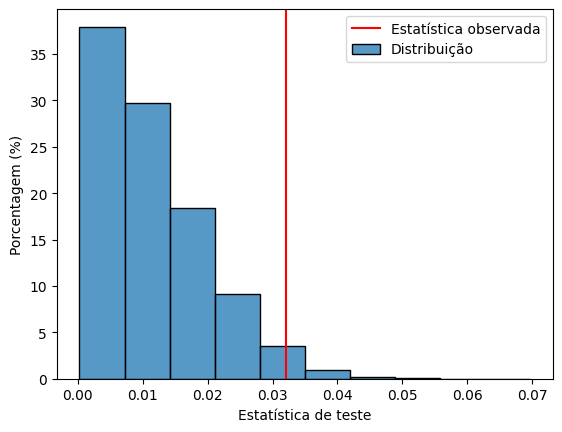

In [9]:
eixo = sns.histplot(resultado, stat="percent", bins=10, label="Distribuição")
eixo.axvline(0.032, label="Estatística observada", color="red")
eixo.set_xlabel("Estatística de teste")
eixo.set_ylabel("Porcentagem (%)")
eixo.legend()

E agora, nesta situação você rejeitaria $H_0$ ou não rejeitaria $H_0$?

É provável que você não esteja confortável de chegar em uma conclusão apenas pela a análise visual do gráfico acima&#x2026; afinal, para que valor da estatística observada que nós passamos de uma situação de não rejeitar $H_0$ para uma situação de rejeitar $H_0$?

É justamente por conta deste problema que é importantíssimo definirmos o nosso nível de confiança entes de iniciar qualquer teste de hipótese. O nível de confiança que irá nos dizer para quais valores da estatística observada que rejeitamos ou não $H_0$.

Para seguir em frente precisamos obter o valor do *nível de significância* (usualmente escrito com a letra grega $\alpha$). Este valor é simplesmente 1 menos o nível de confiança.



In [10]:
significancia = 1 - nivel_confianca
print(f"O nível de significância estatística deste trabalho é {significancia:.3f}")

O nível de significância estatística deste trabalho é 0.050


O próximo passo é calcular a fração de simulações que são *tão ruins quanto ou mais ruins* que a estatística observada e comparar ela com a significância estatística. &ldquo;Mais ruim&rdquo; neste caso é o valor ir na direção de rejeitar $H_0$. Para a situação estudada, trata-se de valores *maiores* da estatística de teste. Vamos computar isso primeiramente para o experimento original de Mendel.



In [11]:
array = np.array(resultado)
logic = array >= estatistica_observada

fracao = sum(logic) / len(array)

print(f"A fração de simulações tão ruins ou mais que a estatística observada foi de {fracao:.5f}")

print()

if fracao < significancia:
    print("Com esta observação, devemos rejeitar H0")
else:
    print("Com esta observação, não devemos rejeitar H0")

A fração de simulações tão ruins ou mais que a estatística observada foi de 0.51850

Com esta observação, não devemos rejeitar H0


E para o resultado do cenário hipotético?



In [12]:
array = np.array(resultado)
logic = array >= 0.032

fracao = sum(logic) / len(array)

print(f"A fração de simulações tão ruins ou mais que a estatística observada foi de {fracao:.5f}")

print()

if fracao < significancia:
    print("Com esta observação, devemos rejeitar H0")
else:
    print("Com esta observação, não devemos rejeitar H0")

A fração de simulações tão ruins ou mais que a estatística observada foi de 0.02410

Com esta observação, devemos rejeitar H0


Esta fração de simulações tão ruins ou mais do que a estatística observada tem um nome: *nível de significância observado*. Como este nome é grande demais, usualmente chamamos esta fração de *p-valor*.

**Definição**: O p-valor de um teste é a probabilidade de se obter o resultado observado ou resultados ainda mais extremos (isto é, resultados que suportam ainda mais a hipótese alternativa) dentro da suposição que a hipótese nula está correta.

**Definição**: O nível de significância é a probabilidade de se rejeitar $H_0$ quando não se deveria rejeitar $H_0$.

**Definição**: Erro tipo I é quando rejeitamos $H_0$ sendo que não deveríamos rejeitar $H_0$.

**Definição**: Erro tipo II é quando não rejeitamos $H_0$ sendo que deveríamos ter rejeitado $H_0$.

Valores usuais para o nível de significância $\alpha$ são (em ordem de frequência): 0.05, 0.01, 0.001 e 0.1.

Regras a serem seguidas:

1.  Sempre reporte o p-valor do seu teste estatístico. Evite reportar apenas $p<0.05$ ou coisa similar.

2.  Defina seu nível de significância (ou nível de confiança) antes de iniciar sua investigação científica. Evite usar valores não usuais para $\alpha$.

3.  Mesmo que você rejeite $H_0$ com um teste de hipótese, este teste não irá te dizer o motivo do modelo proposto em $H_0$ não funcionar. Evite conclusões causais sem evidências para suportar suas conclusões.



## Robert Swain e o painel quase nada enviesado



Robert Swain foi julgado pela suprema corte norte americana em 1962 e condenado a passar o restante de sua vida na prisão. Robert recorreu ao veredito alegando que a composição do painel de júris feria a 4ª emenda da constituição norte americana. A corte negou seu recurso alegando que a composição do júri era condizente com o esperado de um sorteio aleatório.

O painel de júris de Robert Swain era composto por 100 pessoas, sendo 8 delas pessoas negras. Na cidade onde pode ter ocorrido o crime sendo julgado, o censo nos diz que 26% são pessoas negras. A 4ª emenda da constituição americana nos diz que a composição do painel de júris deve refletir a sociedade. Será que este painel está mesmo respeitando a 4ª emenda? Ah, vale ressaltar que Robert Swain era negro.

Vamos levantar nossas hipóteses estatísticas:

-   $H_0$: O painel de júris observado no caso de Robert Swain (100 pessoas sendo 8 delas negras) é *fruto do acaso* de selecionar 100 pessoas quaisquer de uma população com 26% de pessoas negras.

-   $H_1$: O painel de júris de Robert Swain tem *menos* negros do que seria esperado para um sorteio aleatório de 100 pessoas quaisquer de uma população com 26% de pessoas negras.

O primeiro passo, assim como fizemos no problema anterior, é escolher uma estatística de teste. Poderíamos escolher novamente a distância de variação total, não há problema algum em seguir desta forma. Apenas para mostrar que é possível escolher outra estatística, vamos observar então o número de pessoas negras no júri como sendo a nossa estatística de teste.



In [13]:
rotulos = ["negro", "não negro"]
distribuicao_modelo = [0.26, 0.74]

estatistica_observada = 8
print(f"O valor da estatística de teste observado foi de {estatistica_observada}")

O valor da estatística de teste observado foi de 8


Vamos criar a simulação e rodar um experimento na luz de $H_0$ (isto é, o que observamos se $H_0$ estiver correto?).



In [14]:
def simulacao():
    """Sorteia um painel de júris e retorna o número de pessoas negras."""

    N = 100  # número de pessoas no painel
    rotulos = ["negro", "não negro"]
    distribuicao_modelo = [0.26, 0.74]  # distribuição da população

    painel_simulado = random.choices(
        rotulos, weights=distribuicao_modelo, k=N
    )

    distribuicao_obtida = []

    num_negros = painel_simulado.count("negro")

    return num_negros


def experimento(n):
    resultado = []
    for _ in range(n):
        num_negros = simulacao()
        resultado.append(num_negros)
    return resultado


NUM_REPETICOES = 100000

resultado = experimento(NUM_REPETICOES)

Vamos observar a distribuição do nosso experimento.



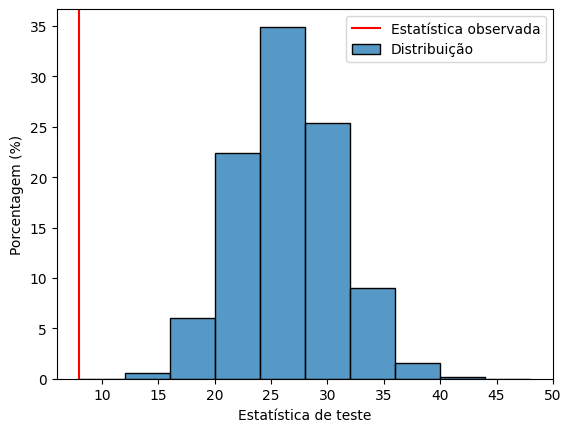

In [15]:
eixo = sns.histplot(resultado, stat="percent", bins=10, label="Distribuição")
eixo.axvline(estatistica_observada, label="Estatística observada", color="red")
eixo.set_xlabel("Estatística de teste")
eixo.set_ylabel("Porcentagem (%)")
eixo.legend()

Sem fazer cálculo algum, apenas observando este resultado, você **rejeitaria** ou **não rejeitaria** $H_0$? Vamos computar o p-valor e finalizar nosso teste de hipótese.



In [16]:
array = np.array(resultado)
logic = array <= estatistica_observada

pvalor = sum(logic) / len(array)

print(f"O p-valor observado foi de {pvalor:.5f}")

print()

if pvalor < significancia:
    print("Com esta observação, devemos rejeitar H0")
else:
    print("Com esta observação, não devemos rejeitar H0")

O p-valor observado foi de 0.00001

Com esta observação, devemos rejeitar H0


Observe que é bastante raro observar um painel de júris com tão poucos negros que tenha sido sorteado aleatoriamente na cidade onde Robert morava. Apesar de ser *possível* observar este resultado por acaso, nossa simulação demonstrou que é bastante *improvável*.

Quando nosso modelo não reflete a realidade, então é necessário descartar o modelo uma vez que a realidade nós não podemos descartar. Nosso modelo é que os júris são sorteados de forma a refletir a sociedade ($H_0$). Nosso resultado nos faz **rejeitar** esta hipótese.

Segundo a referência [1] (de onde este problema foi retirado), outros júris da época de Robert contavam com 10 a 15 negros apenas. Estes valores são também bastante improváveis dentro do cenário que observamos na simulação. Dizemos que a escolha dos membros dos júris era bastante *enviesada*.



## Crônicas de &rsquo;Mérica &#x2014; Condado Alameda, sistema judiciário e o racismo estrutural



Nos anos de 2009 a 2010, no condado de Alameda na Califórnia, um total de 1453 pessoas eram elegíveis para compor painéis de júri. Sempre que um júri se fazia necessário, 100 pessoas eram sorteadas destas 1453.

Veja na tabela abaixo a distribuição de etnias considerando as 1453 pessoas elegíveis e veja também qual foi a distribuição de etnias nos painéis formados durante os anos de 2009 e 2010.



In [17]:
import pandas as pd

juri = {
    "Etnia": ["Asiáticos", "Negros", "Brancos", "Latinos", "Outros"],
    "Elegível": [0.15, 0.18, 0.54, 0.12, 0.01],
    "Painéis formados (média)": [0.26, 0.08, 0.54, 0.08, 0.04],
}

df = pd.DataFrame.from_dict(juri)

df

,Etnia,Elegível,Painéis formados (média)
0,Asiáticos,0.15,0.26
1,Negros,0.18,0.08
2,Brancos,0.54,0.54
3,Latinos,0.12,0.08
4,Outros,0.01,0.04


Vamos levantar nossas hipóteses estatísticas:

-   $H_0$: Os painéis de júri observados estão condizentes com o sorteio aleatório dos 1453 membros elegíveis.

-   $H_1$: Os painéis de júri observados *não* estão condizentes com o sorteio aleatório dos 1453 membros elegíveis.

Tendo as hipóteses, precisamos escolher uma estatística de teste. Observe que agora a nossa hipótese alternativa nos diz que &ldquo;os painéis não estão condizente com o sorteio aleatório&rdquo;. Neste caso, precisamos levar em conta todas as etnias do painel, não podemos usar apenas uma. Para isso, voltamos a utilizar a distância de variação total.



In [18]:
distribuicao_modelo = df["Elegível"]
distribuicao_observada = df["Painéis formados (média)"]

estatistica_observada = computa_dist_var_total(
    distribuicao_modelo, distribuicao_observada
)

print(f"O valor da estatística de teste observado foi de {estatistica_observada}")

O valor da estatística de teste observado foi de 0.14


Vamos realizar um experimento de simulação na luz da hipótese nula.



In [19]:
def simulacao(rotulos, distribuicao_modelo):
    """Sorteia um painel de júris e computa a distância da variação total."""

    N1 = 1453  # número de pessoas elegíveis
    N2 = 100   # número de pessoas no painel

    elegiveis = random.choices(
        rotulos, weights=distribuicao_modelo, k=N1
    )

    painel_simulado = random.sample(elegiveis, k=N2)

    distribuicao_obtida = []

    for rotulo in rotulos:
        proporcao = painel_simulado.count(rotulo) / N2
        distribuicao_obtida.append(proporcao)

    distancia = computa_dist_var_total(
        distribuicao_modelo, distribuicao_obtida
    )

    return distancia


def experimento(n, rotulos, distribuicao_modelo):
    resultado = []
    for _ in range(n):
        distancia = simulacao(rotulos, distribuicao_modelo)
        resultado.append(distancia)
    return resultado


NUM_REPETICOES = 10000

rotulos = df["Etnia"]
distribuicao_modelo = df["Elegível"]

resultado = experimento(NUM_REPETICOES, rotulos, distribuicao_modelo)

Vamos observar a distribuição da estatística de teste.



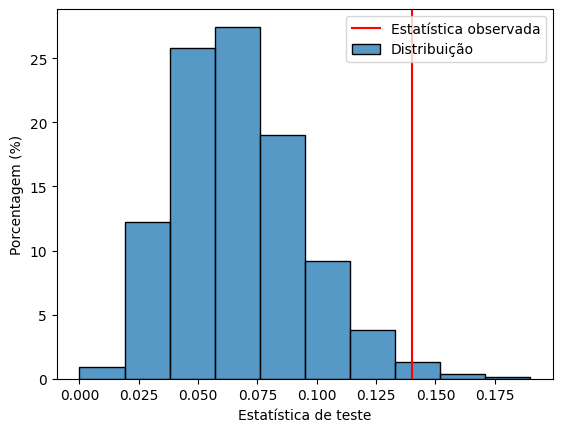

In [20]:
import seaborn as sns

eixo = sns.histplot(resultado, stat="percent", bins=10, label="Distribuição")
eixo.axvline(estatistica_observada, label="Estatística observada", color="red")
eixo.set_xlabel("Estatística de teste")
eixo.set_ylabel("Porcentagem (%)")
eixo.legend()

E, finalmente, vamos computar o p-valor e encerrar nosso teste de hipótese.



In [21]:
array = np.array(resultado)
logic = array <= estatistica_observada

pvalor = sum(logic) / len(array)

print(f"O p-valor observado foi de {pvalor:.5f}")

print()

if pvalor < significancia:
    print("Com esta observação, devemos rejeitar H0")
else:
    print("Com esta observação, não devemos rejeitar H0")

O p-valor observado foi de 0.98880

Com esta observação, não devemos rejeitar H0


## XKCD relevante



![img](https://imgs.xkcd.com/comics/hypothesis_generation.png)

`Imagem: Hypothesis Generation (XKCD) disponível em https://xkcd.com/2569`



## Referências



1.  ADHIKARI, Ani; DENERO, John; WAGNER, David. Computational and Inferential Thinking: The Foundations of Data Science. Disponível em: [https://inferentialthinking.com/chapters/intro.html](https://inferentialthinking.com/chapters/intro.html). Acesso em: 02 out. 2023.

2.  DEVORE, Jay L. Probabilidade E Estatística Para Engenharia E Ciências. Tradução Da 9ª Edição Norte-Americana. Cengage Learning, 2018.

3.  Distância da variação total [https://en.wikipedia.org/wiki/Total_variation_distance_of_probability_measures](https://en.wikipedia.org/wiki/Total_variation_distance_of_probability_measures)

4.  Nível de significância [https://pt.wikipedia.org/wiki/Signific%C3%A2ncia_estat%C3%ADstica](https://pt.wikipedia.org/wiki/Signific%C3%A2ncia_estat%C3%ADstica)

